# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   link (https://www.kaggle.com/datasets/fahadrehman07/retail-transaction-dataset)


Dataset ini adalah Retail Transaction Dataset yang berisi data transaksi penjualan ritel. Dataset ini mencakup informasi mengenai pelanggan, produk, metode pembayaran, lokasi toko, dan detail keuangan transaksi.

Atribut (Kolom) dalam dataset:

1. CustomerID: ID unik pelanggan.
2. ProductID: ID unik produk.
3. Quantity: Jumlah barang yang dibeli.
4. Price: Harga satuan produk.
5. TransactionDate: Tanggal dan waktu transaksi.
6. PaymentMethod: Metode pembayaran (Cash, Credit Card, PayPal, dll).
7. StoreLocation: Alamat toko.
8. ProductCategory: Kategori produk (Electronics, Clothing, dll).
9. DiscountApplied(%): Diskon yang diberikan dalam persen.
10. TotalAmount: Total nominal transaksi.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Membaca dataset
df = pd.read_csv('Retail-Transaction-Dataset_raw.csv')

# Menampilkan 5 baris pertama
print("5 Baris Pertama Data:")
display(df.head())

# Menampilkan informasi dataset
print("\nInformasi Dataset:")
df.info()

5 Baris Pertama Data:


,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

,CustomerID,Quantity,Price,DiscountApplied(%),TotalAmount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,500463.982180,5.009290,55.067344,10.020155,248.334955
std,288460.917524,2.579808,25.971567,5.779534,184.554792
min,14.000000,1.000000,10.000430,0.000046,8.274825
25%,250693.750000,3.000000,32.549474,5.001013,95.163418
50%,499679.000000,5.000000,55.116789,10.030353,200.368393
75%,751104.750000,7.000000,77.456763,15.018367,362.009980
max,999997.000000,9.000000,99.999284,19.999585,896.141242


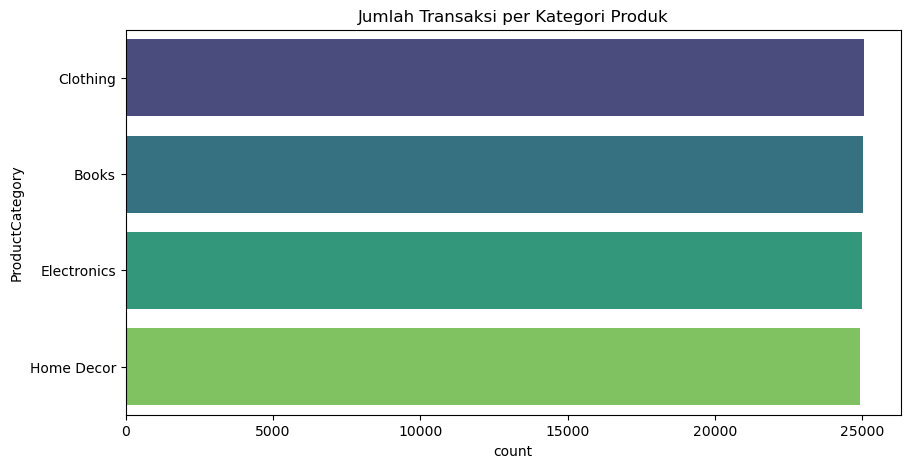

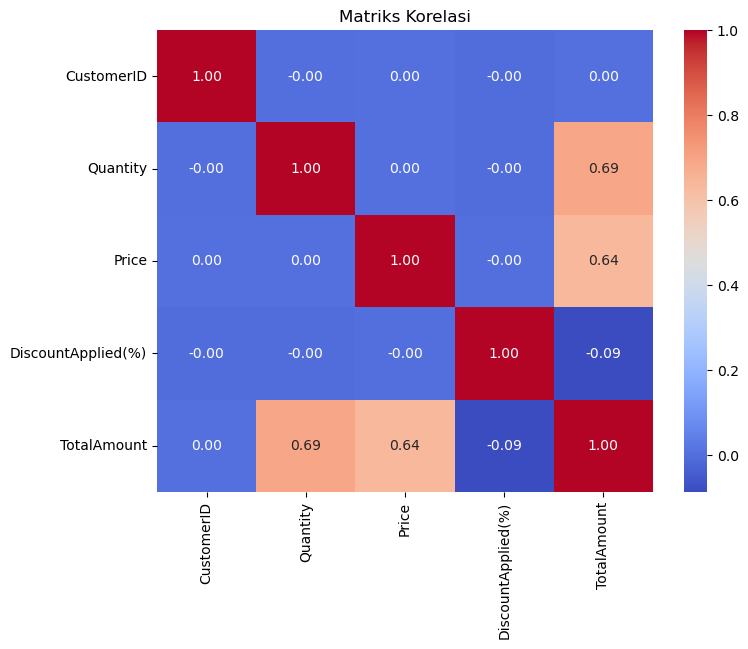

In [3]:
# Statistik Deskriptif
display(df.describe())

# Visualisasi Distribusi Kategori Produk
plt.figure(figsize=(10, 5))
sns.countplot(y='ProductCategory', data=df, order=df['ProductCategory'].value_counts().index, palette='viridis')
plt.title('Jumlah Transaksi per Kategori Produk')
plt.show()

# Visualisasi Korelasi antar Fitur Numerik
plt.figure(figsize=(8, 6))
# Hanya mengambil kolom numerik untuk korelasi
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# 1. Menghapus Data Duplikat
print(f"Jumlah duplikat sebelum dihapus: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

# 2. Menghapus Baris Kosong (Missing Values)
print(f"Jumlah missing values sebelum dihapus:\n{df.isnull().sum()}")
df.dropna(inplace=True)

# 3. Mengubah TransactionDate menjadi tipe DateTime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

# 4. Mengubah nama kolom 'DiscountApplied(%)' menjadi 'DiscountApplied'
df.rename(columns={'DiscountApplied(%)': 'DiscountApplied'}, inplace=True)

# 5. Menghapus kolom yang tidak diperlukan ('StoreLocation' dan 'ProductID')
df.drop(columns=['StoreLocation', 'ProductID'], inplace=True)

# 6. Encoding kolom Kategorikal ('PaymentMethod' dan 'ProductCategory')
le_payment = LabelEncoder()
df['PaymentMethod'] = le_payment.fit_transform(df['PaymentMethod'])

le_product = LabelEncoder()
df['ProductCategory'] = le_product.fit_transform(df['ProductCategory'])

# 7. Menyimpan hasil preprocessing ke variabel baru 'df_clean'
df_clean = df.copy()


Jumlah duplikat sebelum dihapus: 0
Jumlah missing values sebelum dihapus:
CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64


In [5]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CustomerID       100000 non-null  int64         
 1   Quantity         100000 non-null  int64         
 2   Price            100000 non-null  float64       
 3   TransactionDate  100000 non-null  datetime64[ns]
 4   PaymentMethod    100000 non-null  int32         
 5   ProductCategory  100000 non-null  int32         
 6   DiscountApplied  100000 non-null  float64       
 7   TotalAmount      100000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2)
memory usage: 5.3 MB


In [6]:
df_clean.head()

,CustomerID,Quantity,Price,TransactionDate,PaymentMethod,ProductCategory,DiscountApplied,TotalAmount
0,109318,7,80.079844,2023-12-26 12:32:00,0,0,18.677100,455.862764
1,993229,4,75.195229,2023-08-05 00:00:00,0,3,14.121365,258.306546
2,579675,8,31.528816,2024-03-11 18:51:00,0,0,15.943701,212.015651
3,799826,5,98.880218,2023-10-27 22:00:00,3,0,6.686337,461.343769
4,121413,7,93.188512,2023-12-22 11:38:00,0,2,4.030096,626.030484


In [7]:
# Ekspor df_clean ke file CSV
df_clean.to_csv("Retail-Transaction-Dataset_preprocessing.csv", index=False)

print("File Retail-Transaction-Dataset_preprocessing.csv berhasil dibuat.")

File Retail-Transaction-Dataset_preprocessing.csv berhasil dibuat.


In [1]:

!pip freeze requirements.txt

absl-py==2.3.0
aiobotocore @ file:///C:/b/abs_a0zxrsvpwx/croot/aiobotocore_1714464454692/work
aiohappyeyeballs @ file:///C:/b/abs_b505trsapr/croot/aiohappyeyeballs_1725434036096/work
aiohttp @ file:///C:/b/abs_13j6efxjb7/croot/aiohttp_1725529348885/work
aioitertools @ file:///tmp/build/80754af9/aioitertools_1607109665762/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///C:/b/abs_45ba4vacaj/croot/alabaster_1718201502252/work
ale-py==0.11.2
altair @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/altair_1699497320503/work
anaconda-anon-usage @ file:///C:/b/abs_c3w_h1zzjg/croot/anaconda-anon-usage_1710965204622/work
anaconda-catalogs @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/anaconda-catalogs_1701816586117/work
anaconda-client @ file:///C:/b/abs_34txutm0ue/croot/anaconda-client_1708640705294/work
anaconda-cloud-auth @ file:///C:/b/abs_b02evi84gh/croot/anaconda-cloud-auth_1713991445770/work
anaconda-navigator @ 